#IMPORTAR LIBRERIAS NECESARIAS

In [ ]:
import pandas as pd
import numpy as np

#CARGA DE DATOS, ARCHIVO CSV ##ZONAS VERDES

In [ ]:
zonas_verdes = pd.read_csv(
    '../data_zonas_verdes/Superficie ocupada por parques, jardines y zonas verdes urbanas (%_suelo urbano).csv',
    sep=';',
    encoding='latin1'
)

#REVISIÓN DE LA ESTRUCTURA DE LOS DATOS

In [ ]:
zonas_verdes.head(15) 

,"Indicadores municipales de sostenibilidad: Superficie ocupada por parques, jardines y zonas verdes urbanas (%/suelo urbano)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resumen de datos,NaN,NaN,NaN,NaN,NaN,NaN
2,Entidad,NaN,2009,2008,2007,2006,2005
3,Araba/Álava,NaN,"10,90","10,63","10,56","8,68","8,74"
4,Bizkaia,NaN,"13,27","12,22","13,09","11,84","11,45"
5,CAE,NaN,"14,41","13,31","14,07","11,56","11,35"
6,Gipuzkoa,NaN,"20,12","18,05","19,80","14,58","14,31"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Detalle por comarcas,NaN,NaN,NaN,NaN,NaN,NaN
9,Código comarca,Comarca,2009,2008,2007,2006,2005


In [ ]:
zonas_verdes.iloc[9:] #encabezados de la tabla reales

,"Indicadores municipales de sostenibilidad: Superficie ocupada por parques, jardines y zonas verdes urbanas (%/suelo urbano)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
9,Código comarca,Comarca,2009,2008,2007,2006,2005
10,01100,Arabako Ibarrak / Valles Alaveses,"4,89",NaN,NaN,NaN,NaN
11,01200,Arabako Lautada / Llanada Alavesa,"14,73",NaN,NaN,NaN,NaN
12,01300,Arabako Mendialdea / Montaña Alavesa,"3,21",NaN,NaN,NaN,NaN
13,48100,Arratia Nerbioi / Arratia-Nervión,"22,70",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
277,48915,Ziortza-Bolibar,"17,78","23,53","23,53","23,53","8,26"
278,20028,Zizurkil,"12,17","12,17","12,27","13,45","13,45"
279,01063,Zuia,"6,01","6,01","5,66","5,93","5,93"
280,20081,Zumaia,"7,09","7,09","7,09","7,23","7,24"


#SELECCIÓN DE LOS DATOS MÁS INTERESANTES:

In [ ]:
zonas_verdes_provincias = zonas_verdes.iloc[2:9] #datos por provincias
zonas_verdes_provincias.columns =['provincia', 'col2', '2009', '2008', '2007', '2006', '2005'] #nombres de columnas
zonas_verdes_provincias = zonas_verdes_provincias.drop([7,8]) #datos no interesantes
zonas_verdes_provincias = zonas_verdes_provincias.reset_index(drop=True)  #indice a partir de 0

In [ ]:
zonas_verdes_provincias = zonas_verdes_provincias[sorted(zonas_verdes_provincias.columns)] #ordenar columnas
zonas_verdes_provincias = zonas_verdes_provincias.drop(columns='col2') #eliminar columnas

In [ ]:
zonas_verdes_provincias = zonas_verdes_provincias.drop([0])

#PREPARACION DE LOS DATOS A ANALIZAR

In [ ]:
for col in zonas_verdes_provincias.columns:
    if col != 'provincia':
        zonas_verdes_provincias[col] = (
            zonas_verdes_provincias[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )

In [ ]:
zonas_verdes_provincias #zonas verdes, resumen por provincias

,2005,2006,2007,2008,2009,provincia
1,8.74,8.68,10.56,10.63,10.90,Araba/Álava
2,11.45,11.84,13.09,12.22,13.27,Bizkaia
3,11.35,11.56,14.07,13.31,14.41,CAE
4,14.31,14.58,19.80,18.05,20.12,Gipuzkoa


In [ ]:
zonas_verdes #diferencia con completa

,"Indicadores municipales de sostenibilidad: Superficie ocupada por parques, jardines y zonas verdes urbanas (%/suelo urbano)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resumen de datos,NaN,NaN,NaN,NaN,NaN,NaN
2,Entidad,NaN,2009,2008,2007,2006,2005
3,Araba/Álava,NaN,"10,90","10,63","10,56","8,68","8,74"
4,Bizkaia,NaN,"13,27","12,22","13,09","11,84","11,45"
...,...,...,...,...,...,...,...
277,48915,Ziortza-Bolibar,"17,78","23,53","23,53","23,53","8,26"
278,20028,Zizurkil,"12,17","12,17","12,27","13,45","13,45"
279,01063,Zuia,"6,01","6,01","5,66","5,93","5,93"
280,20081,Zumaia,"7,09","7,09","7,09","7,23","7,24"


#COMPROBACIÓN DATOS DEL DATAFRAME

In [ ]:
zonas_verdes.head(25) #datos por municipios

,"Indicadores municipales de sostenibilidad: Superficie ocupada por parques, jardines y zonas verdes urbanas (%/suelo urbano)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resumen de datos,NaN,NaN,NaN,NaN,NaN,NaN
2,Entidad,NaN,2009,2008,2007,2006,2005
3,Araba/Álava,NaN,"10,90","10,63","10,56","8,68","8,74"
4,Bizkaia,NaN,"13,27","12,22","13,09","11,84","11,45"
5,CAE,NaN,"14,41","13,31","14,07","11,56","11,35"
6,Gipuzkoa,NaN,"20,12","18,05","19,80","14,58","14,31"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Detalle por comarcas,NaN,NaN,NaN,NaN,NaN,NaN
9,Código comarca,Comarca,2009,2008,2007,2006,2005


In [ ]:
zonas_verdes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 7 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                       --------------  ----- 
 0   Indicadores municipales de sostenibilidad: Superficie ocupada por parques, jardines y zonas verdes urbanas (%/suelo urbano)  279 non-null    object
 1   Unnamed: 1                                                                                                                   271 non-null    object
 2   Unnamed: 2                                                                                                                   274 non-null    object
 3   Unnamed: 3                                                                                                                   2

In [ ]:
zonas_verdes.describe()

,"Indicadores municipales de sostenibilidad: Superficie ocupada por parques, jardines y zonas verdes urbanas (%/suelo urbano)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,279,271,274,253,251,249,249
unique,279,271,256,237,235,240,228
top,20080,Zumarraga,"7,69",2008,2007,2006,2005
freq,1,1,4,3,3,3,3


In [ ]:
zonas_verdes_provincias ##DATOS TABLA POR PROVINCIA

,2005,2006,2007,2008,2009,provincia
1,8.74,8.68,10.56,10.63,10.90,Araba/Álava
2,11.45,11.84,13.09,12.22,13.27,Bizkaia
3,11.35,11.56,14.07,13.31,14.41,CAE
4,14.31,14.58,19.80,18.05,20.12,Gipuzkoa


-------------

-------------

##ZONAS VERDES POR PERSONA

#CARGA DEL CSV, REVISIÓN DE LA ESTRUCTURA, LIMPIEZA DE COLUMNAS O FILAS, SELECCIÓN INFORMACIÓN INTERESANTE

In [ ]:
zonas_verdes_persona = pd.read_csv(
    '../data_zonas_verdes/Superficie ocupada por parques, jardines y zonas verdes urbanas (m_persona).csv',
    sep=';',
    encoding='latin1')

In [ ]:
zonas_verdes_persona.head(15)

,"Indicadores municipales de sostenibilidad: Superficie ocupada por parques, jardines y zonas verdes urbanas (m²/persona)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resumen de datos,NaN,NaN,NaN,NaN,NaN,NaN
2,Entidad,NaN,2009,2008,2007,2006,2005
3,Araba/Álava,NaN,"24,79","24,42","24,66","20,51","20,69"
4,Bizkaia,NaN,"11,48","10,55","11,03","9,98","9,75"
5,CAE,NaN,"15,67","14,46","15,03","12,38","12,20"
6,Gipuzkoa,NaN,"18,42","16,44","17,32","12,75","12,48"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Detalle por comarcas,NaN,NaN,NaN,NaN,NaN,NaN
9,Código comarca,Comarca,2009,2008,2007,2006,2005


In [ ]:
zonas_verdes_persona.iloc[9:]

,"Indicadores municipales de sostenibilidad: Superficie ocupada por parques, jardines y zonas verdes urbanas (m²/persona)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
9,Código comarca,Comarca,2009,2008,2007,2006,2005
10,01100,Arabako Ibarrak / Valles Alaveses,"60,97",NaN,NaN,NaN,NaN
11,01200,Arabako Lautada / Llanada Alavesa,"23,94",NaN,NaN,NaN,NaN
12,01300,Arabako Mendialdea / Montaña Alavesa,"28,10",NaN,NaN,NaN,NaN
13,48100,Arratia Nerbioi / Arratia-Nervión,"42,24",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
277,48915,Ziortza-Bolibar,"18,22","18,96","19,14","19,46","19,75"
278,20028,Zizurkil,"16,78","16,65","16,68","16,74","16,52"
279,01063,Zuia,"64,08","64,64","61,32","62,02","63,20"
280,20081,Zumaia,"7,67","7,71","7,87","8,32","8,38"


In [ ]:
zonas_verdes_persona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 7 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   Indicadores municipales de sostenibilidad: Superficie ocupada por parques, jardines y zonas verdes urbanas (m²/persona)  279 non-null    object
 1   Unnamed: 1                                                                                                               271 non-null    object
 2   Unnamed: 2                                                                                                               274 non-null    object
 3   Unnamed: 3                                                                                                               253 non-null    object
 4

In [ ]:
zonas_verdes_persona.describe()

,"Indicadores municipales de sostenibilidad: Superficie ocupada por parques, jardines y zonas verdes urbanas (m²/persona)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,279,271,274,253,251,249,249
unique,279,271,264,243,242,237,239
top,20080,Zumarraga,2009,2008,2007,2006,2005
freq,1,1,3,3,3,3,3


In [152]:
zonas_verdes_persona.iloc[9:]
zonas_verdes_provincias = zonas_verdes.iloc[3:10].copy() #datos por provincias
zonas_verdes_provincias.columns =['provincia', 'col2', '2009', '2008', '2007', '2006', '2005'] #nombres de columnas
zonas_verdes_provincias = zonas_verdes_provincias.drop([7,8]) #datos no interesantes
zonas_verdes_provincias = zonas_verdes_provincias.reset_index(drop=True)  #indice a partir de 0
zonas_verdes_provincias #zonas verdes, resumen por provincias
zonas_verdes_provincias = zonas_verdes_provincias[sorted(zonas_verdes_provincias.columns)]
zonas_verdes_provincias = zonas_verdes_provincias.drop(columns='col2')
zonas_verdes_provincias = zonas_verdes_provincias.drop([4])




In [153]:
zonas_verdes_persona_provincias = zonas_verdes_persona.iloc[3:10].copy() #datos por provincias

In [154]:
zonas_verdes_persona_provincias

,"Indicadores municipales de sostenibilidad: Superficie ocupada por parques, jardines y zonas verdes urbanas (m²/persona)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
3,Araba/Álava,NaN,"24,79","24,42","24,66","20,51","20,69"
4,Bizkaia,NaN,"11,48","10,55","11,03","9,98","9,75"
5,CAE,NaN,"15,67","14,46","15,03","12,38","12,20"
6,Gipuzkoa,NaN,"18,42","16,44","17,32","12,75","12,48"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Detalle por comarcas,NaN,NaN,NaN,NaN,NaN,NaN
9,Código comarca,Comarca,2009,2008,2007,2006,2005


In [155]:
zonas_verdes_persona_provincias.columns=['provincia', 'col2', '2009', '2008', '2007', '2006', '2005'] #nombres de columnas
zonas_verdes_persona_provincias

,provincia,col2,2009,2008,2007,2006,2005
3,Araba/Álava,NaN,"24,79","24,42","24,66","20,51","20,69"
4,Bizkaia,NaN,"11,48","10,55","11,03","9,98","9,75"
5,CAE,NaN,"15,67","14,46","15,03","12,38","12,20"
6,Gipuzkoa,NaN,"18,42","16,44","17,32","12,75","12,48"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Detalle por comarcas,NaN,NaN,NaN,NaN,NaN,NaN
9,Código comarca,Comarca,2009,2008,2007,2006,2005


In [156]:
zonas_verdes_persona_provincias = zonas_verdes_persona_provincias.drop([7,9]) #datos no interesantes
zonas_verdes_persona_provincias= zonas_verdes_persona_provincias.drop(columns='col2')
zonas_verdes_persona_provincias= zonas_verdes_persona_provincias[sorted(zonas_verdes_persona_provincias.columns)]
zonas_verdes_persona_provincias= zonas_verdes_persona_provincias.reset_index(drop=True)  #indice a partir de 0
zonas_verdes_persona_provincias = zonas_verdes_persona_provincias.drop(4)
zonas_verdes_persona_provincias


,2005,2006,2007,2008,2009,provincia
0,"20,69","20,51","24,66","24,42","24,79",Araba/Álava
1,"9,75","9,98","11,03","10,55","11,48",Bizkaia
2,"12,20","12,38","15,03","14,46","15,67",CAE
3,"12,48","12,75","17,32","16,44","18,42",Gipuzkoa


In [157]:
for col in zonas_verdes_persona_provincias:
    if col != 'provincia':
        zonas_verdes_persona_provincias[col] = (
            zonas_verdes_persona_provincias[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )

In [158]:
zonas_verdes_persona_provincias ####DATOS TABLA POR PROVINCIA

,2005,2006,2007,2008,2009,provincia
0,20.69,20.51,24.66,24.42,24.79,Araba/Álava
1,9.75,9.98,11.03,10.55,11.48,Bizkaia
2,12.20,12.38,15.03,14.46,15.67,CAE
3,12.48,12.75,17.32,16.44,18.42,Gipuzkoa


-------------

-------------

##SUPERFICIE AGRICOLA

#CARGA DEL CSV, REVISIÓN DE LA ESTRUCTURA, LIMPIEZA DE COLUMNAS O FILAS, SELECCIÓN INFORMACIÓN INTERESANTE

In [159]:
supeficie_agricola = pd.read_csv(
    '../data_zonas_verdes/Superficie agricola (% s_ superficie total).csv',
    sep=';',
    encoding='latin1')

In [160]:
supeficie_agricola.head(15)

,Indicadores municipales de sostenibilidad: Superficie agrícola (% s/ superficie total),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resumen de datos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Entidad,NaN,2023,2022,2021,2020,2019,2018,2016,2005
3,Araba/Álava,NaN,"27,99","28,02","27,87","27,87","27,87","27,28","27,96","28,49"
4,Bizkaia,NaN,"1,05","1,05","0,95","0,96","0,97","0,97","0,97","0,94"
5,CAE,NaN,"12,41","12,42","12,32","12,32","12,32","12,09","12,36","12,39"
6,Gipuzkoa,NaN,"1,31","1,32","1,28","1,28","1,28","1,24","1,29","0,77"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Detalle por comarcas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Código comarca,Comarca,2023,2022,2021,2020,2019,2018,2016,2005


In [161]:
supeficie_agricola.iloc[9:]

,Indicadores municipales de sostenibilidad: Superficie agrícola (% s/ superficie total),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
9,Código comarca,Comarca,2023,2022,2021,2020,2019,2018,2016,2005
10,01100,Arabako Ibarrak / Valles Alaveses,"32,44","32,47","32,47","32,47","32,47","32,46","32,45","33,08"
11,01200,Arabako Lautada / Llanada Alavesa,"38,54","38,59","38,59","38,59","38,58","38,57","38,58","39,65"
12,01300,Arabako Mendialdea / Montaña Alavesa,"20,87","20,92","20,91","20,91","20,91","20,90","21,47","21,17"
13,48100,Arratia Nerbioi / Arratia-Nervión,"0,81","0,82","0,77","0,77","0,77","0,79","0,80","0,87"
...,...,...,...,...,...,...,...,...,...,...
279,48915,Ziortza-Bolibar,"0,11","0,11","0,11","0,11","0,11","0,11","0,11","0,08"
280,20028,Zizurkil,"0,38","0,38","0,26","0,26","0,26","0,26","0,26","0,06"
281,01063,Zuia,"0,29","0,29","0,29","0,29","0,29","0,29","0,29","0,36"
282,20081,Zumaia,"3,00","3,00","2,72","2,72","2,72","2,72","2,70","0,44"


In [162]:
supeficie_agricola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 10 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Indicadores municipales de sostenibilidad: Superficie agrícola (% s/ superficie total)  281 non-null    object
 1   Unnamed: 1                                                                              273 non-null    object
 2   Unnamed: 2                                                                              278 non-null    object
 3   Unnamed: 3                                                                              278 non-null    object
 4   Unnamed: 4                                                                              278 non-null    object
 5   Unnamed: 5                                                                    

In [163]:
supeficie_agricola.describe()

,Indicadores municipales de sostenibilidad: Superficie agrícola (% s/ superficie total),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,281,273,278,278,278,278,278,278,278,278
unique,281,273,202,206,202,198,200,203,203,188
top,20080,Zumarraga,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
freq,1,1,8,8,9,9,9,10,10,18


In [164]:
supeficie_agricola.iloc[9:]
supeficie_agricola_provincias = supeficie_agricola.iloc[3:10].copy() #datos por provincias
supeficie_agricola_provincias.columns =['provincia', 'col2','2023', '2022', '2021', '2020', '2019', '2018', '2016', '2005']
supeficie_agricola_provincias = supeficie_agricola_provincias.reset_index(drop=True)


In [165]:
supeficie_agricola_provincias = supeficie_agricola_provincias.drop([4,5]) #datos no interesantes

In [166]:
supeficie_agricola_provincias = supeficie_agricola_provincias.drop([6])

In [167]:
supeficie_agricola_provincias = supeficie_agricola_provincias.drop(columns = 'col2')

In [168]:
supeficie_agricola_provincias  = supeficie_agricola_provincias [sorted(supeficie_agricola_provincias.columns)]

In [169]:
for col in supeficie_agricola_provincias:
    if col != 'provincia':
        supeficie_agricola_provincias[col] = (
            supeficie_agricola_provincias[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )

In [170]:
supeficie_agricola_provincias ##DATOS POR PROVINCIA

,2005,2016,2018,2019,2020,2021,2022,2023,provincia
0,28.49,27.96,27.28,27.87,27.87,27.87,28.02,27.99,Araba/Álava
1,0.94,0.97,0.97,0.97,0.96,0.95,1.05,1.05,Bizkaia
2,12.39,12.36,12.09,12.32,12.32,12.32,12.42,12.41,CAE
3,0.77,1.29,1.24,1.28,1.28,1.28,1.32,1.31,Gipuzkoa


-------------

-------------

#SUPERFICIE FORESTAL

In [171]:
superficie_forestal= pd.read_csv(
    '../data_zonas_verdes/Superficie forestal (% s  superficie total).csv',
    sep=';',
    encoding='latin1')

In [172]:
superficie_forestal.head(15)

,Indicadores municipales de sostenibilidad: Superficie forestal (% s superficie total),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resumen de datos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Entidad,NaN,2023,2022,2021,2020,2019,2018,2016,2010,2005
3,Araba/Álava,NaN,"46,74","46,78","46,76","46,71","46,66","46,51","46,51","46,38","46,59"
4,Bizkaia,NaN,"59,72","59,69","59,65","59,45","58,90","58,57","59,70","59,42","58,92"
5,CAE,NaN,"54,80","54,80","54,77","54,66","54,46","54,19","54,95","54,87","54,83"
6,Gipuzkoa,NaN,"61,66","61,63","61,60","61,50","61,45","61,10","62,57","62,79","62,89"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Detalle por comarcas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Código comarca,Comarca,2023,2022,2021,2020,2019,2018,2016,2010,2005


In [173]:
superficie_forestal.iloc[9:]

,Indicadores municipales de sostenibilidad: Superficie forestal (% s superficie total),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
9,Código comarca,Comarca,2023,2022,2021,2020,2019,2018,2016,2010,2005
10,01100,Arabako Ibarrak / Valles Alaveses,"47,57","47,59","47,58","47,58","47,60","47,44","47,44","47,80","47,85"
11,01200,Arabako Lautada / Llanada Alavesa,"36,11","36,21","36,21","36,21","36,21","35,98","35,97","36,06","36,30"
12,01300,Arabako Mendialdea / Montaña Alavesa,"61,73","61,76","61,77","61,76","61,65","61,45","61,45","60,93","61,35"
13,48100,Arratia Nerbioi / Arratia-Nervión,"69,55","69,51","69,45","69,15","68,64","68,29","69,75","69,13","69,33"
...,...,...,...,...,...,...,...,...,...,...,...
279,48915,Ziortza-Bolibar,"76,54","76,49","76,27","75,74","74,68","74,36","75,96","63,11","76,73"
280,20028,Zizurkil,"54,31","54,31","54,31","54,25","54,25","54,25","56,42","57,61","57,61"
281,01063,Zuia,"68,50","68,50","68,46","68,49","68,48","68,50","68,59","68,22","69,36"
282,20081,Zumaia,"24,91","24,91","24,91","24,91","24,91","24,72","25,56","23,54","23,45"


In [174]:
superficie_forestal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 11 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Indicadores municipales de sostenibilidad: Superficie forestal (% s  superficie total)  281 non-null    object
 1   Unnamed: 1                                                                              273 non-null    object
 2   Unnamed: 2                                                                              278 non-null    object
 3   Unnamed: 3                                                                              278 non-null    object
 4   Unnamed: 4                                                                              278 non-null    object
 5   Unnamed: 5                                                                    

In [175]:
superficie_forestal.describe()

,Indicadores municipales de sostenibilidad: Superficie forestal (% s superficie total),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
count,281,273,278,278,278,278,278,278,278,278,278
unique,281,273,271,271,268,268,271,270,269,272,270
top,20080,Zumarraga,2023,2022,"66,65",2020,2019,2018,2016,2010,2005
freq,1,1,3,3,3,3,3,3,3,3,3


In [176]:
superficie_forestal_provinincia = superficie_forestal.iloc[:9]
superficie_forestal_provinincia.columns =['provincia', 'col2', '2023', '2022', '2021', '2020', '2019', '2018', '2016', '2010', '2005']


In [177]:
superficie_forestal_provinincia  = superficie_forestal_provinincia.drop(columns='col2')

In [178]:
superficie_forestal_provinincia  = superficie_forestal_provinincia [sorted(superficie_forestal_provinincia.columns)] #ordenar

In [179]:
superficie_forestal_provinincia = superficie_forestal_provinincia.drop([1,2]) #datos no interesantes

In [180]:
superficie_forestal_provinincia = superficie_forestal_provinincia.drop([0]) 

In [181]:
superficie_forestal_provinincia = superficie_forestal_provinincia.dropna(how= 'all') #valores nan

In [182]:
superficie_forestal_provinincia = superficie_forestal_provinincia.drop([8]) 

In [183]:
superficie_forestal_provinincia= superficie_forestal_provinincia.reset_index(drop=True)  #indice a partir de 0

In [184]:
for col in superficie_forestal_provinincia:
    if col != 'provincia':
        superficie_forestal_provinincia[col] = (
            superficie_forestal_provinincia[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )

In [185]:
superficie_forestal_provinincia ##DATOS PROVINCIA

,2005,2010,2016,2018,2019,2020,2021,2022,2023,provincia
0,46.59,46.38,46.51,46.51,46.66,46.71,46.76,46.78,46.74,Araba/Álava
1,58.92,59.42,59.70,58.57,58.90,59.45,59.65,59.69,59.72,Bizkaia
2,54.83,54.87,54.95,54.19,54.46,54.66,54.77,54.80,54.80,CAE
3,62.89,62.79,62.57,61.10,61.45,61.50,61.60,61.63,61.66,Gipuzkoa


-------------

-------------

#SUPERFICIE FORESTAL PUBLICA

In [186]:
superficie_forestal_publica= pd.read_csv(
    '../data_zonas_verdes/Superficie forestal publica (% s_ superficie forestal total).csv',
    sep=';',
    encoding='latin1')

In [187]:
superficie_forestal_publica.head(15)

,Indicadores municipales de sostenibilidad: Superficie forestal pública (% s/ superficie forestal total),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resumen de datos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Entidad,NaN,2023,2022,2021,2020,2019,2018,2016,2005
3,Araba/Álava,NaN,"76,51","76,52","76,53","76,51","76,52","76,49","76,47","76,26"
4,Bizkaia,NaN,"24,08","24,22","23,64","23,71","23,79","23,88","23,70","23,03"
5,CAE,NaN,"42,07","42,13","41,95","41,98","42,06","42,11","41,67","41,05"
6,Gipuzkoa,NaN,"21,46","21,49","21,50","21,52","21,52","21,52","21,18","19,93"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Detalle por comarcas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Código comarca,Comarca,2023,2022,2021,2020,2019,2018,2016,2005


In [188]:
superficie_forestal_publica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 10 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   Indicadores municipales de sostenibilidad: Superficie forestal pública (% s/ superficie forestal total)  281 non-null    object
 1   Unnamed: 1                                                                                               273 non-null    object
 2   Unnamed: 2                                                                                               278 non-null    object
 3   Unnamed: 3                                                                                               278 non-null    object
 4   Unnamed: 4                                                                                  

In [189]:
superficie_forestal_publica.describe()

,Indicadores municipales de sostenibilidad: Superficie forestal pública (% s/ superficie forestal total),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,281,273,278,278,278,278,278,278,278,278
unique,281,273,206,206,209,209,205,206,208,198
top,20080,Zumarraga,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
freq,1,1,67,66,65,65,65,66,65,73


In [190]:
superficie_forestal_publica_provincias = superficie_forestal_publica.iloc[:9]
superficie_forestal_publica_provincias.columns =['provincia', 'col2','2023', '2022', '2021', '2020', '2019', '2018', '2016', '2005']

In [191]:
superficie_forestal_publica_provincias = superficie_forestal_publica_provincias.dropna(how ='all')

In [192]:
superficie_forestal_publica_provincias = superficie_forestal_publica_provincias.drop([8])

In [193]:
superficie_forestal_publica_provincias = superficie_forestal_publica_provincias.drop(columns="col2")

In [194]:
superficie_forestal_publica_provincias = superficie_forestal_publica_provincias.drop([1])

In [195]:
superficie_forestal_publica_provincias = superficie_forestal_publica_provincias.drop([2])

In [196]:
superficie_forestal_publica_provincias = superficie_forestal_publica_provincias[sorted(superficie_forestal_publica_provincias.columns)]

In [197]:
superficie_forestal_publica_provincias= superficie_forestal_publica_provincias.reset_index(drop=True) 

In [198]:
for col in superficie_forestal_publica_provincias:
    if col != 'provincia':
        superficie_forestal_publica_provincias[col] = (
            superficie_forestal_publica_provincias[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )

In [199]:
superficie_forestal_publica_provincias  ##DATOS PROVINCIAS

,2005,2016,2018,2019,2020,2021,2022,2023,provincia
0,76.26,76.47,76.49,76.52,76.51,76.53,76.52,76.51,Araba/Álava
1,23.03,23.70,23.88,23.79,23.71,23.64,24.22,24.08,Bizkaia
2,41.05,41.67,42.11,42.06,41.98,41.95,42.13,42.07,CAE
3,19.93,21.18,21.52,21.52,21.52,21.50,21.49,21.46,Gipuzkoa


-------

-------

#SUPERFICIE ESPECIAL PROTECCIÓN

In [200]:
especial_proteccion= pd.read_csv(
    '../data_zonas_verdes/Superficie municipal de especial proteccion (% superficie total).csv',
    sep=';',
    encoding='latin1')

In [201]:
especial_proteccion.head(15)

,Indicadores municipales de sostenibilidad: Superficie municipal de especial protección (% superficie total),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resumen de datos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Entidad,NaN,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2006
3,Araba/Álava,NaN,"27,40","26,92","26,87","22,14","22,14","22,14","22,11","20,37","20,39","19,94","19,98","20,20","20,35","20,40","19,15","19,17","18,50"
4,Bizkaia,NaN,"19,17","19,59","19,59","19,60","19,25","19,26","19,22","19,57","19,99","19,68","19,14","18,83","19,46","19,49","19,05","19,14","20,18"
5,CAE,NaN,"23,62","23,78","23,61","21,83","21,72","21,76","21,51","20,80","21,00","20,71","20,37","20,39","20,67","20,60","19,76","19,98","19,23"
6,Gipuzkoa,NaN,"22,89","23,74","23,19","23,94","23,94","24,08","23,22","22,90","23,12","23,11","22,40","22,48","22,55","22,19","21,53","22,21","19,26"
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Detalle por comarcas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Código comarca,Comarca,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2006


In [202]:
especial_proteccion_provincia = especial_proteccion.iloc[:10]
especial_proteccion_provincia = especial_proteccion_provincia.dropna(how= 'all')

In [203]:
especial_proteccion_provincia.columns = ['provincia', 'col2', '2023', '2022', '2021', '2020', '2019','2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011','2010', '2009', '2008', '2006']

In [204]:
especial_proteccion_provincia= especial_proteccion_provincia.drop(columns="col2")

In [205]:
especial_proteccion_provincia= especial_proteccion_provincia[sorted(especial_proteccion_provincia)]


In [206]:
especial_proteccion_provincia = especial_proteccion_provincia.dropna(how='all')

In [207]:
especial_proteccion_provincia = especial_proteccion_provincia.drop(1)

In [208]:
especial_proteccion_provincia = especial_proteccion_provincia.drop(2)

In [209]:
especial_proteccion_provincia = especial_proteccion_provincia.reset_index(drop=True)

In [210]:
especial_proteccion_provincia = especial_proteccion_provincia.drop([4,5])

In [211]:
for col in especial_proteccion_provincia:
    if col != 'provincia':
        especial_proteccion_provincia[col] = (
            especial_proteccion_provincia[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )

In [212]:
especial_proteccion_provincia ##datos tabla provincias

,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,provincia
0,18.50,19.17,19.15,20.40,20.35,20.20,19.98,19.94,20.39,20.37,22.11,22.14,22.14,22.14,26.87,26.92,27.40,Araba/Álava
1,20.18,19.14,19.05,19.49,19.46,18.83,19.14,19.68,19.99,19.57,19.22,19.26,19.25,19.60,19.59,19.59,19.17,Bizkaia
2,19.23,19.98,19.76,20.60,20.67,20.39,20.37,20.71,21.00,20.80,21.51,21.76,21.72,21.83,23.61,23.78,23.62,CAE
3,19.26,22.21,21.53,22.19,22.55,22.48,22.40,23.11,23.12,22.90,23.22,24.08,23.94,23.94,23.19,23.74,22.89,Gipuzkoa


----------

----------

#RESUMEN DE DATAFRAMES GENERADOS:

In [213]:
from IPython.display import display

In [214]:
display('Las zonas verdes son',zonas_verdes_provincias,'Las zonas verdes por persona son:',zonas_verdes_persona_provincias,'Las superficie agricola es:', supeficie_agricola_provincias,'La superficie forestal es:', superficie_forestal_provinincia,'Las superficie forestal publica es:', superficie_forestal_publica_provincias,'Las zonas de especial proteccion son', especial_proteccion_provincia)

'Las zonas verdes son'

,2005,2006,2007,2008,2009,provincia
0,"8,74","8,68","10,56","10,63","10,90",Araba/Álava
1,"11,45","11,84","13,09","12,22","13,27",Bizkaia
2,"11,35","11,56","14,07","13,31","14,41",CAE
3,"14,31","14,58","19,80","18,05","20,12",Gipuzkoa


'Las zonas verdes por persona son:'

,2005,2006,2007,2008,2009,provincia
0,20.69,20.51,24.66,24.42,24.79,Araba/Álava
1,9.75,9.98,11.03,10.55,11.48,Bizkaia
2,12.20,12.38,15.03,14.46,15.67,CAE
3,12.48,12.75,17.32,16.44,18.42,Gipuzkoa


'Las superficie agricola es:'

,2005,2016,2018,2019,2020,2021,2022,2023,provincia
0,28.49,27.96,27.28,27.87,27.87,27.87,28.02,27.99,Araba/Álava
1,0.94,0.97,0.97,0.97,0.96,0.95,1.05,1.05,Bizkaia
2,12.39,12.36,12.09,12.32,12.32,12.32,12.42,12.41,CAE
3,0.77,1.29,1.24,1.28,1.28,1.28,1.32,1.31,Gipuzkoa


'La superficie forestal es:'

,2005,2010,2016,2018,2019,2020,2021,2022,2023,provincia
0,46.59,46.38,46.51,46.51,46.66,46.71,46.76,46.78,46.74,Araba/Álava
1,58.92,59.42,59.70,58.57,58.90,59.45,59.65,59.69,59.72,Bizkaia
2,54.83,54.87,54.95,54.19,54.46,54.66,54.77,54.80,54.80,CAE
3,62.89,62.79,62.57,61.10,61.45,61.50,61.60,61.63,61.66,Gipuzkoa


'Las superficie forestal publica es:'

,2005,2016,2018,2019,2020,2021,2022,2023,provincia
0,76.26,76.47,76.49,76.52,76.51,76.53,76.52,76.51,Araba/Álava
1,23.03,23.70,23.88,23.79,23.71,23.64,24.22,24.08,Bizkaia
2,41.05,41.67,42.11,42.06,41.98,41.95,42.13,42.07,CAE
3,19.93,21.18,21.52,21.52,21.52,21.50,21.49,21.46,Gipuzkoa


'Las zonas de especial proteccion son'

,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,provincia
0,18.50,19.17,19.15,20.40,20.35,20.20,19.98,19.94,20.39,20.37,22.11,22.14,22.14,22.14,26.87,26.92,27.40,Araba/Álava
1,20.18,19.14,19.05,19.49,19.46,18.83,19.14,19.68,19.99,19.57,19.22,19.26,19.25,19.60,19.59,19.59,19.17,Bizkaia
2,19.23,19.98,19.76,20.60,20.67,20.39,20.37,20.71,21.00,20.80,21.51,21.76,21.72,21.83,23.61,23.78,23.62,CAE
3,19.26,22.21,21.53,22.19,22.55,22.48,22.40,23.11,23.12,22.90,23.22,24.08,23.94,23.94,23.19,23.74,22.89,Gipuzkoa


In [215]:
dataframes = [zonas_verdes_provincias,zonas_verdes_persona_provincias,supeficie_agricola_provincias , superficie_forestal_provinincia, superficie_forestal_publica_provincias
 , especial_proteccion_provincia]

for df in dataframes:
    df.set_index('provincia', inplace= False)

dataframes

[    2005   2006   2007   2008   2009    provincia
 0   8,74   8,68  10,56  10,63  10,90  Araba/Álava
 1  11,45  11,84  13,09  12,22  13,27      Bizkaia
 2  11,35  11,56  14,07  13,31  14,41          CAE
 3  14,31  14,58  19,80  18,05  20,12     Gipuzkoa,
     2005   2006   2007   2008   2009    provincia
 0  20.69  20.51  24.66  24.42  24.79  Araba/Álava
 1   9.75   9.98  11.03  10.55  11.48      Bizkaia
 2  12.20  12.38  15.03  14.46  15.67          CAE
 3  12.48  12.75  17.32  16.44  18.42     Gipuzkoa,
     2005   2016   2018   2019   2020   2021   2022   2023    provincia
 0  28.49  27.96  27.28  27.87  27.87  27.87  28.02  27.99  Araba/Álava
 1   0.94   0.97   0.97   0.97   0.96   0.95   1.05   1.05      Bizkaia
 2  12.39  12.36  12.09  12.32  12.32  12.32  12.42  12.41          CAE
 3   0.77   1.29   1.24   1.28   1.28   1.28   1.32   1.31     Gipuzkoa,
     2005   2010   2016   2018   2019   2020   2021   2022   2023    provincia
 0  46.59  46.38  46.51  46.51  46.66  46.71  46

In [216]:
dataframes = [zonas_verdes_provincias,zonas_verdes_persona_provincias,supeficie_agricola_provincias , superficie_forestal_provinincia, superficie_forestal_publica_provincias
 , especial_proteccion_provincia]

for df in dataframes:
    df.set_index('provincia', inplace= True)

dataframes

[              2005   2006   2007   2008   2009
 provincia                                     
 Araba/Álava   8,74   8,68  10,56  10,63  10,90
 Bizkaia      11,45  11,84  13,09  12,22  13,27
 CAE          11,35  11,56  14,07  13,31  14,41
 Gipuzkoa     14,31  14,58  19,80  18,05  20,12,
               2005   2006   2007   2008   2009
 provincia                                     
 Araba/Álava  20.69  20.51  24.66  24.42  24.79
 Bizkaia       9.75   9.98  11.03  10.55  11.48
 CAE          12.20  12.38  15.03  14.46  15.67
 Gipuzkoa     12.48  12.75  17.32  16.44  18.42,
               2005   2016   2018   2019   2020   2021   2022   2023
 provincia                                                          
 Araba/Álava  28.49  27.96  27.28  27.87  27.87  27.87  28.02  27.99
 Bizkaia       0.94   0.97   0.97   0.97   0.96   0.95   1.05   1.05
 CAE          12.39  12.36  12.09  12.32  12.32  12.32  12.42  12.41
 Gipuzkoa      0.77   1.29   1.24   1.28   1.28   1.28   1.32   1.31,
       

In [217]:
display('Las zonas verdes son',zonas_verdes_provincias,'Las zonas verdes por persona son:',zonas_verdes_persona_provincias,'Las superficie agricola es:', supeficie_agricola_provincias,'La superficie forestal es:', superficie_forestal_provinincia,'Las superficie forestal publica es:', superficie_forestal_publica_provincias,'Las zonas de especial proteccion son', especial_proteccion_provincia)

'Las zonas verdes son'

,2005,2006,2007,2008,2009
provincia,,,,,
Araba/Álava,"8,74","8,68","10,56","10,63","10,90"
Bizkaia,"11,45","11,84","13,09","12,22","13,27"
CAE,"11,35","11,56","14,07","13,31","14,41"
Gipuzkoa,"14,31","14,58","19,80","18,05","20,12"


'Las zonas verdes por persona son:'

,2005,2006,2007,2008,2009
provincia,,,,,
Araba/Álava,20.69,20.51,24.66,24.42,24.79
Bizkaia,9.75,9.98,11.03,10.55,11.48
CAE,12.20,12.38,15.03,14.46,15.67
Gipuzkoa,12.48,12.75,17.32,16.44,18.42


'Las superficie agricola es:'

,2005,2016,2018,2019,2020,2021,2022,2023
provincia,,,,,,,,
Araba/Álava,28.49,27.96,27.28,27.87,27.87,27.87,28.02,27.99
Bizkaia,0.94,0.97,0.97,0.97,0.96,0.95,1.05,1.05
CAE,12.39,12.36,12.09,12.32,12.32,12.32,12.42,12.41
Gipuzkoa,0.77,1.29,1.24,1.28,1.28,1.28,1.32,1.31


'La superficie forestal es:'

,2005,2010,2016,2018,2019,2020,2021,2022,2023
provincia,,,,,,,,,
Araba/Álava,46.59,46.38,46.51,46.51,46.66,46.71,46.76,46.78,46.74
Bizkaia,58.92,59.42,59.70,58.57,58.90,59.45,59.65,59.69,59.72
CAE,54.83,54.87,54.95,54.19,54.46,54.66,54.77,54.80,54.80
Gipuzkoa,62.89,62.79,62.57,61.10,61.45,61.50,61.60,61.63,61.66


'Las superficie forestal publica es:'

,2005,2016,2018,2019,2020,2021,2022,2023
provincia,,,,,,,,
Araba/Álava,76.26,76.47,76.49,76.52,76.51,76.53,76.52,76.51
Bizkaia,23.03,23.70,23.88,23.79,23.71,23.64,24.22,24.08
CAE,41.05,41.67,42.11,42.06,41.98,41.95,42.13,42.07
Gipuzkoa,19.93,21.18,21.52,21.52,21.52,21.50,21.49,21.46


'Las zonas de especial proteccion son'

,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
provincia,,,,,,,,,,,,,,,,,
Araba/Álava,18.50,19.17,19.15,20.40,20.35,20.20,19.98,19.94,20.39,20.37,22.11,22.14,22.14,22.14,26.87,26.92,27.40
Bizkaia,20.18,19.14,19.05,19.49,19.46,18.83,19.14,19.68,19.99,19.57,19.22,19.26,19.25,19.60,19.59,19.59,19.17
CAE,19.23,19.98,19.76,20.60,20.67,20.39,20.37,20.71,21.00,20.80,21.51,21.76,21.72,21.83,23.61,23.78,23.62
Gipuzkoa,19.26,22.21,21.53,22.19,22.55,22.48,22.40,23.11,23.12,22.90,23.22,24.08,23.94,23.94,23.19,23.74,22.89


----------

----------

#GUARDADO DE LOS DATOS EN CSV:

In [218]:
zonas_verdes_persona_provincias

,2005,2006,2007,2008,2009
provincia,,,,,
Araba/Álava,20.69,20.51,24.66,24.42,24.79
Bizkaia,9.75,9.98,11.03,10.55,11.48
CAE,12.20,12.38,15.03,14.46,15.67
Gipuzkoa,12.48,12.75,17.32,16.44,18.42


In [219]:
zonas_verdes_provincias.to_csv('zonas_verdes_provincias') #guardar en un csv

In [220]:
zonas_verdes_persona_provincias.to_csv('zonas_verdes_persona_provincias')

In [221]:
supeficie_agricola_provincias.to_csv('supeficie_agricola_provincias')

In [222]:
superficie_forestal_provinincia.to_csv('superficie_forestal_provinincia')

In [223]:
superficie_forestal_publica_provincias.to_csv('superficie_forestal_publica_provincias')

In [224]:
especial_proteccion_provincia.to_csv('especial_proteccion_provincia')

----------

----------

#REVISIÓN DE LOS DATOS  (TENDENCIAS) , PARA ENCONTRAR DESVIACIONES:

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

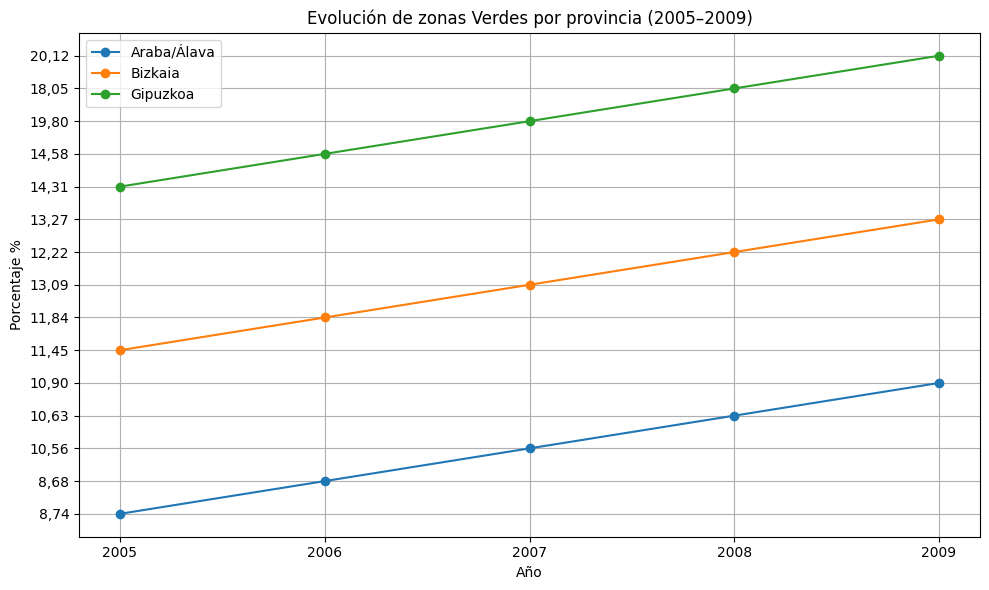

In [226]:
# tendencia zonas verdes - años
df1 = zonas_verdes_provincias.T 
provincias_grafico = ['Araba/Álava', 'Bizkaia', 'Gipuzkoa']
df1 = df1[provincias_grafico]

plt.figure(figsize=(10, 6))
for provincia in df1.columns:
    plt.plot(df1.index, df1[provincia], marker='o', label=provincia)
plt.title("Evolución de zonas Verdes por provincia (2005–2009)")
plt.xlabel("Año")
plt.ylabel("Porcentaje %")
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

In [227]:
zonas_verdes_provincias

,2005,2006,2007,2008,2009
provincia,,,,,
Araba/Álava,"8,74","8,68","10,56","10,63","10,90"
Bizkaia,"11,45","11,84","13,09","12,22","13,27"
CAE,"11,35","11,56","14,07","13,31","14,41"
Gipuzkoa,"14,31","14,58","19,80","18,05","20,12"


In [228]:
zonas_verdes_persona_provincias

,2005,2006,2007,2008,2009
provincia,,,,,
Araba/Álava,20.69,20.51,24.66,24.42,24.79
Bizkaia,9.75,9.98,11.03,10.55,11.48
CAE,12.20,12.38,15.03,14.46,15.67
Gipuzkoa,12.48,12.75,17.32,16.44,18.42


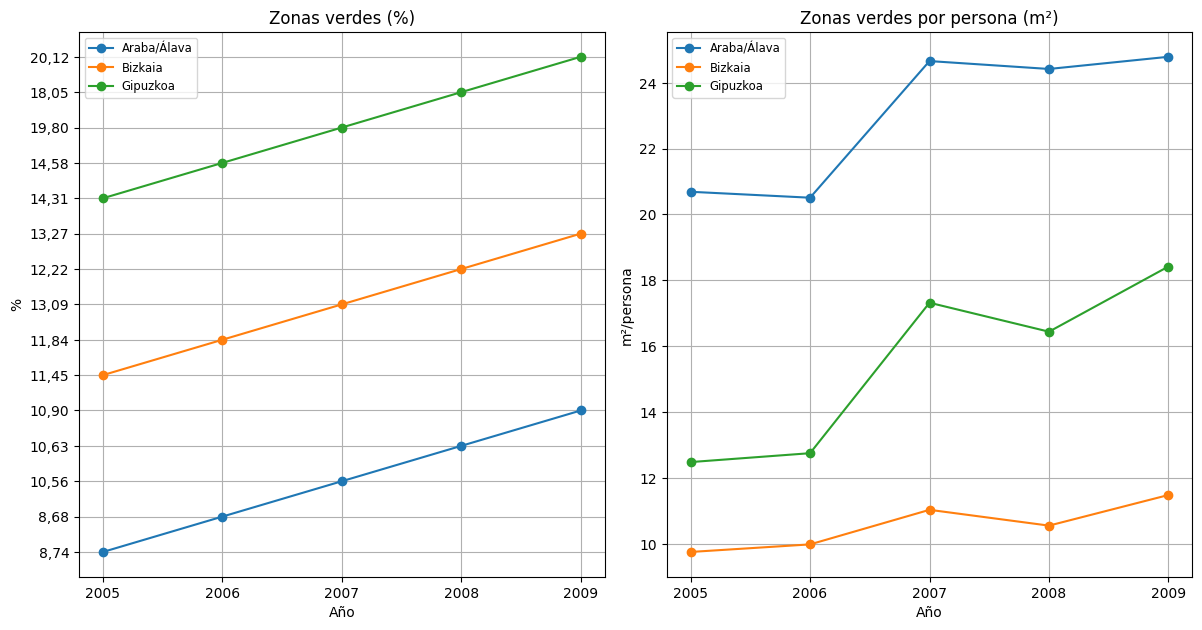

In [229]:
#tendencias zonas verdes
provincias = ['Araba/Álava', 'Bizkaia', 'Gipuzkoa']

dfs = {"Zonas verdes (%)": zonas_verdes_provincias.T[provincias],
       "Zonas verdes por persona (m²)": zonas_verdes_persona_provincias.T[provincias],}

plt.figure(figsize=(18, 12))

for i, (titulo, df) in enumerate(dfs.items(), 1):
    plt.subplot(2, 3, i)
    for provincia in df.columns:
        plt.plot(df.index, df[provincia], marker='o', label=provincia)
    plt.title(titulo)
    plt.xlabel("Año")
    plt.ylabel("%" if "por persona" not in titulo else "m²/persona")
    plt.grid(True)
    plt.legend(fontsize='small')
    

plt.tight_layout()
plt.show()

In [235]:
zonas_verdes_persona_provincias

,2005,2006,2007,2008,2009
provincia,,,,,
Araba/Álava,20.69,20.51,24.66,24.42,24.79
Bizkaia,9.75,9.98,11.03,10.55,11.48
CAE,12.20,12.38,15.03,14.46,15.67
Gipuzkoa,12.48,12.75,17.32,16.44,18.42


In [230]:
#GRAFICO ZONAS VERDES

In [231]:
#tendencia superficie agricola

# Provincias a mostrar
provincias_grafico = ['Gipuzkoa', 'Bizkaia', 'Araba/Álava']
df2 = df2[provincias_grafico]  # Nos quedamos solo con esas columnas

# Gráfico
plt.figure(figsize=(10, 6))
for provincia in df2.columns:
    plt.plot(df2.index, df2[provincia], marker='o', label=provincia)

plt.title("Superficie agrícola (%)")
plt.xlabel("Año")
plt.ylabel("%")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'df2' is not defined

In [ ]:
supeficie_agricola_provincias

,2005,2016,2018,2019,2020,2021,2022,2023
provincia,,,,,,,,
Araba/Álava,28.49,27.96,27.28,27.87,27.87,27.87,28.02,27.99
Bizkaia,0.94,0.97,0.97,0.97,0.96,0.95,1.05,1.05
CAE,12.39,12.36,12.09,12.32,12.32,12.32,12.42,12.41
Gipuzkoa,0.77,1.29,1.24,1.28,1.28,1.28,1.32,1.31


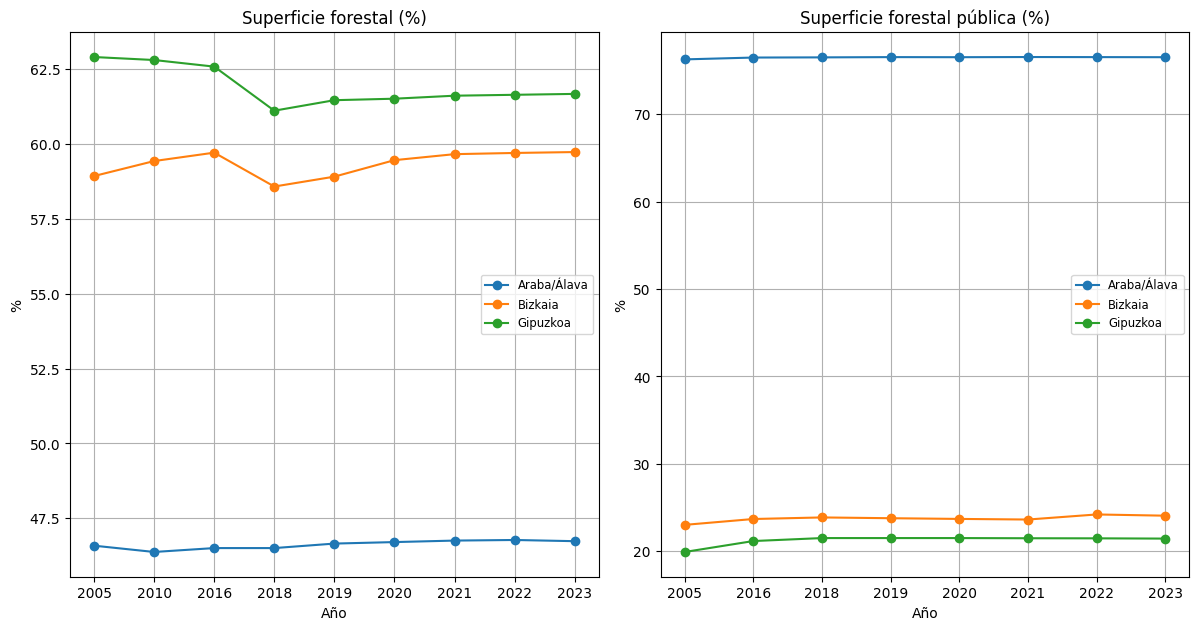

In [ ]:
#tendencia superficie forestal
provincias = ['Araba/Álava', 'Bizkaia', 'Gipuzkoa']

# Transponer y filtrar los DataFrames
dfs = {
    "Superficie forestal (%)": superficie_forestal_provinincia.T[provincias],
    "Superficie forestal pública (%)": superficie_forestal_publica_provincias.T[provincias],

}

plt.figure(figsize=(18, 12))

for i, (titulo, df) in enumerate(dfs.items(), 1):
    plt.subplot(2, 3, i)
    for provincia in df.columns:
        plt.plot(df.index, df[provincia], marker='o', label=provincia)
    plt.title(titulo)
    plt.xlabel("Año")
    plt.ylabel("%" if "por persona" not in titulo else "m²/persona")
    plt.grid(True)
    plt.legend(fontsize='small')

plt.tight_layout()
plt.show()

In [ ]:
superficie_forestal_publica_provincias

,2005,2016,2018,2019,2020,2021,2022,2023
provincia,,,,,,,,
Araba/Álava,76.26,76.47,76.49,76.52,76.51,76.53,76.52,76.51
Bizkaia,23.03,23.70,23.88,23.79,23.71,23.64,24.22,24.08
CAE,41.05,41.67,42.11,42.06,41.98,41.95,42.13,42.07
Gipuzkoa,19.93,21.18,21.52,21.52,21.52,21.50,21.49,21.46


In [ ]:
superficie_forestal_provinincia

,2005,2010,2016,2018,2019,2020,2021,2022,2023
provincia,,,,,,,,,
Araba/Álava,46.59,46.38,46.51,46.51,46.66,46.71,46.76,46.78,46.74
Bizkaia,58.92,59.42,59.70,58.57,58.90,59.45,59.65,59.69,59.72
CAE,54.83,54.87,54.95,54.19,54.46,54.66,54.77,54.80,54.80
Gipuzkoa,62.89,62.79,62.57,61.10,61.45,61.50,61.60,61.63,61.66


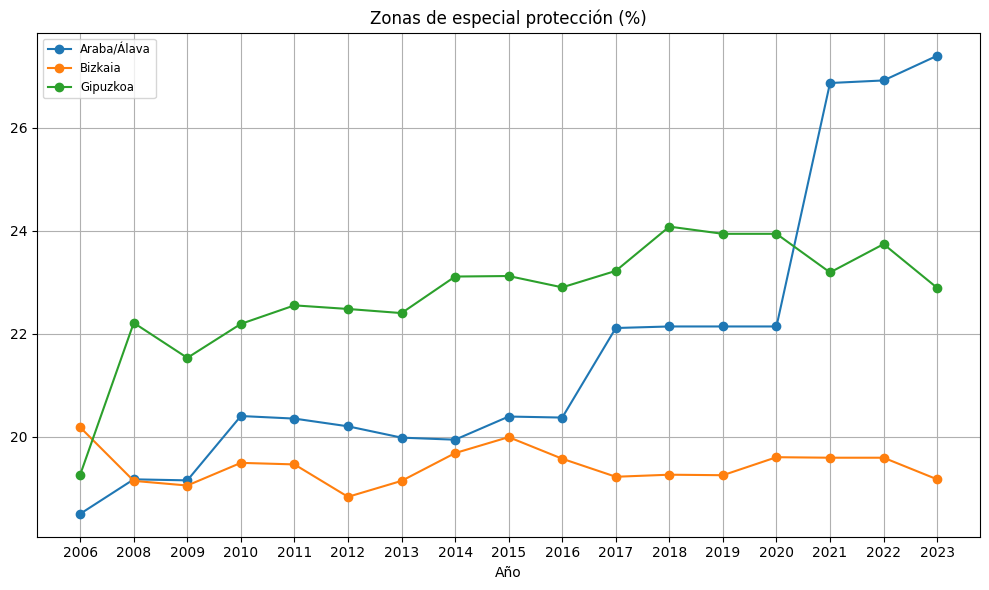

In [ ]:
#tendencia superficie especial proteccion
provincias = ['Araba/Álava', 'Bizkaia', 'Gipuzkoa']

# Transponer y filtrar los DataFrames
dfs = {
    "Zonas de especial protección (%)": especial_proteccion_provincia.T[provincias],
}

plt.figure(figsize=(10,6))

for i, (titulo, df) in enumerate(dfs.items(), 1):
    for provincia in df.columns:
        plt.plot(df.index, df[provincia], marker='o', label=provincia)
    plt.title(titulo)
    plt.xlabel("Año")
    plt.grid(True)
    plt.legend(fontsize='small')

plt.tight_layout()
plt.show()


In [ ]:
especial_proteccion_provincia

,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
provincia,,,,,,,,,,,,,,,,,
Araba/Álava,18.50,19.17,19.15,20.40,20.35,20.20,19.98,19.94,20.39,20.37,22.11,22.14,22.14,22.14,26.87,26.92,27.40
Bizkaia,20.18,19.14,19.05,19.49,19.46,18.83,19.14,19.68,19.99,19.57,19.22,19.26,19.25,19.60,19.59,19.59,19.17
CAE,19.23,19.98,19.76,20.60,20.67,20.39,20.37,20.71,21.00,20.80,21.51,21.76,21.72,21.83,23.61,23.78,23.62
Gipuzkoa,19.26,22.21,21.53,22.19,22.55,22.48,22.40,23.11,23.12,22.90,23.22,24.08,23.94,23.94,23.19,23.74,22.89


----------

----------

#Graficos para visualizar mejor la distribución de las 3 provincias:

In [ ]:
import pandas as pd

In [ ]:
nuevo_csv = pd.read_csv('zonas_verdes_provincias')

In [ ]:
# Años que nos interesan
años = ['2018', '2019', '2020', '2021', '2022', '2023']

# 1. Cargar los CSVs (sin extensión)
superficie_agricola = pd.read_csv('supeficie_agricola_provincias', index_col='provincia')
superficie_forestal = pd.read_csv('superficie_forestal_provinincia', index_col='provincia')
superficie_forestal_publica = pd.read_csv('superficie_forestal_publica_provincias', index_col='provincia')
especial_proteccion = pd.read_csv('especial_proteccion_provincia', index_col='provincia')

# 2. Filtrar columnas por año y renombrarlas para distinguirlas luego
superficie_agricola = superficie_agricola[años].rename(columns=lambda x: f'sup_agricola_{x}')
superficie_forestal = superficie_forestal[años].rename(columns=lambda x: f'sup_forestal_{x}')
superficie_forestal_publica = superficie_forestal_publica[años].rename(columns=lambda x: f'sup_forestal_publica_{x}')
especial_proteccion = especial_proteccion[años].rename(columns=lambda x: f'esp_proteccion_{x}')

# 3. Concatenar todo horizontalmente por provincia
df_final = pd.concat([
    superficie_agricola,
    superficie_forestal,
    superficie_forestal_publica,
    especial_proteccion
], axis=1)

# 4. Guardar a CSV
df_final.to_csv('datos_2018_2023_provincias.csv')

print("Archivo guardado como 'datos_2018_2023_provincias.csv'")


Archivo guardado como 'datos_2018_2023_provincias.csv'


In [ ]:
supeficie_agricola_provincias

,2005,2016,2018,2019,2020,2021,2022,2023
provincia,,,,,,,,
Araba/Álava,28.49,27.96,27.28,27.87,27.87,27.87,28.02,27.99
Bizkaia,0.94,0.97,0.97,0.97,0.96,0.95,1.05,1.05
CAE,12.39,12.36,12.09,12.32,12.32,12.32,12.42,12.41
Gipuzkoa,0.77,1.29,1.24,1.28,1.28,1.28,1.32,1.31


In [ ]:
datos_actualizados = pd.read_csv('datos_2018_2023_provincias.csv')
datos_actualizados

,provincia,sup_agricola_2018,sup_agricola_2019,sup_agricola_2020,sup_agricola_2021,sup_agricola_2022,sup_agricola_2023,sup_forestal_2018,sup_forestal_2019,sup_forestal_2020,...,sup_forestal_publica_2020,sup_forestal_publica_2021,sup_forestal_publica_2022,sup_forestal_publica_2023,esp_proteccion_2018,esp_proteccion_2019,esp_proteccion_2020,esp_proteccion_2021,esp_proteccion_2022,esp_proteccion_2023
0,Araba/Álava,27.28,27.87,27.87,27.87,28.02,27.99,46.51,46.66,46.71,...,76.51,76.53,76.52,76.51,22.14,22.14,22.14,26.87,26.92,27.40
1,Bizkaia,0.97,0.97,0.96,0.95,1.05,1.05,58.57,58.90,59.45,...,23.71,23.64,24.22,24.08,19.26,19.25,19.60,19.59,19.59,19.17
2,CAE,12.09,12.32,12.32,12.32,12.42,12.41,54.19,54.46,54.66,...,41.98,41.95,42.13,42.07,21.76,21.72,21.83,23.61,23.78,23.62
3,Gipuzkoa,1.24,1.28,1.28,1.28,1.32,1.31,61.10,61.45,61.50,...,21.52,21.50,21.49,21.46,24.08,23.94,23.94,23.19,23.74,22.89


In [300]:
#crear columna nueva con la suma de todo
columnas_numericas = datos_actualizados.columns.drop('provincia')
datos_actualizados['Suma_Total_Por_Provincia'] = datos_actualizados[columnas_numericas].sum(axis=1)

print("\n--- DataFrame con la nueva columna 'Suma_Total_Por_Provincia' ---")
print(datos_actualizados)


--- DataFrame con la nueva columna 'Suma_Total_Por_Provincia' ---
     provincia  sup_agricola_2018  sup_agricola_2019  sup_agricola_2020  \
0  Araba/Álava              27.28              27.87              27.87   
1      Bizkaia               0.97               0.97               0.96   
2          CAE              12.09              12.32              12.32   
3     Gipuzkoa               1.24               1.28               1.28   

   sup_agricola_2021  sup_agricola_2022  sup_agricola_2023  sup_forestal_2018  \
0              27.87              28.02              27.99              46.51   
1               0.95               1.05               1.05              58.57   
2              12.32              12.42              12.41              54.19   
3               1.28               1.32               1.31              61.10   

   sup_forestal_2019  sup_forestal_2020  ...  sup_forestal_publica_2021  \
0              46.66              46.71  ...                      76.53   
1

In [301]:
datos_actualizados_provincia = datos_actualizados[datos_actualizados["provincia"] != "CAE"]

In [302]:
datos_actualizados_provincia

,provincia,sup_agricola_2018,sup_agricola_2019,sup_agricola_2020,sup_agricola_2021,sup_agricola_2022,sup_agricola_2023,sup_forestal_2018,sup_forestal_2019,sup_forestal_2020,...,sup_forestal_publica_2021,sup_forestal_publica_2022,sup_forestal_publica_2023,esp_proteccion_2018,esp_proteccion_2019,esp_proteccion_2020,esp_proteccion_2021,esp_proteccion_2022,esp_proteccion_2023,Suma_Total_Por_Provincia
0,Araba/Álava,27.28,27.87,27.87,27.87,28.02,27.99,46.51,46.66,46.71,...,76.53,76.52,76.51,22.14,22.14,22.14,26.87,26.92,27.40,1053.75
1,Bizkaia,0.97,0.97,0.96,0.95,1.05,1.05,58.57,58.90,59.45,...,23.64,24.22,24.08,19.26,19.25,19.60,19.59,19.59,19.17,621.71
3,Gipuzkoa,1.24,1.28,1.28,1.28,1.32,1.31,61.10,61.45,61.50,...,21.50,21.49,21.46,24.08,23.94,23.94,23.19,23.74,22.89,647.44


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\infoa\AppData\Local\Temp\ipykernel_2416\3924513339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='provincia', y='Suma_Total_Por_Provincia', data=datos_actualizados_grafica, palette='viridis')


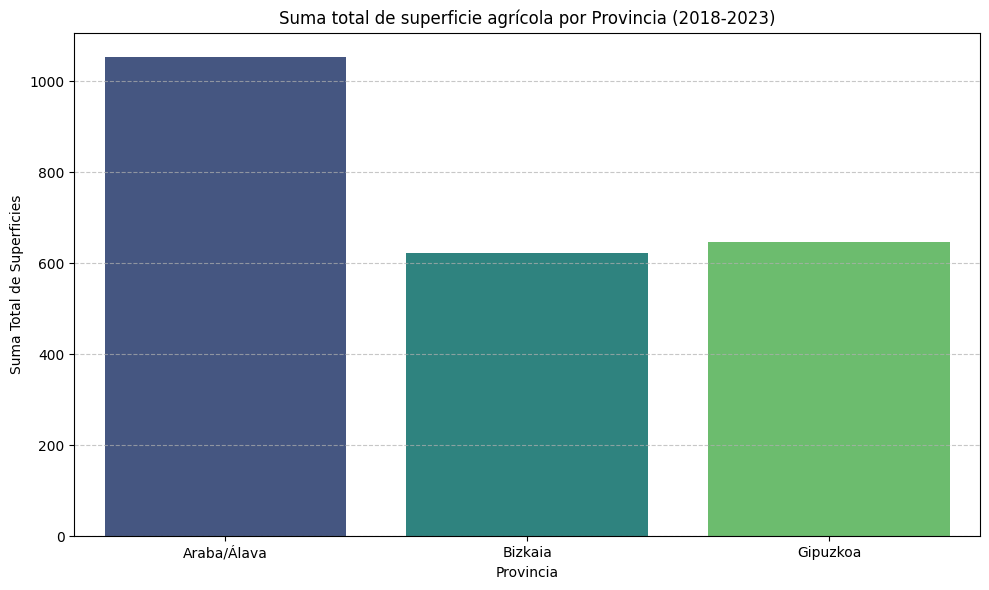

In [ ]:
#suma total por provincias (sin zonas verdes)
plt.figure(figsize=(10, 6)) 
sns.barplot(x='provincia', y='Suma_Total_Por_Provincia', data=datos_actualizados_grafica, palette='viridis')


plt.title('Suma total de superficie agrícola por Provincia (2018-2023)')
plt.xlabel('Provincia')
plt.ylabel('Suma Total de Superficies')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show() 

In [303]:
#suma de forestal por provincia (((SEGUIR)))


# Identificar las columnas con datos forestales
# Esto busca cualquier columna que contenga la palabra 'forestal' en su nombre
columnas_forestales = [col for col in datos_actualizados_provincia.columns if 'forestal' in col]

# Crear un nuevo DataFrame que contenga solo la 'provincia' y las columnas forestales
tabla_forestal = datos_actualizados_provincia[['provincia'] + columnas_forestales]

print("--- Tabla de Superficies Forestales por Provincia y Año ---")
print(tabla_forestal)

--- Tabla de Superficies Forestales por Provincia y Año ---
     provincia  sup_forestal_2018  sup_forestal_2019  sup_forestal_2020  \
0  Araba/Álava              46.51              46.66              46.71   
1      Bizkaia              58.57              58.90              59.45   
3     Gipuzkoa              61.10              61.45              61.50   

   sup_forestal_2021  sup_forestal_2022  sup_forestal_2023  \
0              46.76              46.78              46.74   
1              59.65              59.69              59.72   
3              61.60              61.63              61.66   

   sup_forestal_publica_2018  sup_forestal_publica_2019  \
0                      76.49                      76.52   
1                      23.88                      23.79   
3                      21.52                      21.52   

   sup_forestal_publica_2020  sup_forestal_publica_2021  \
0                      76.51                      76.53   
1                      23.71       

In [304]:
tabla_forestal

,provincia,sup_forestal_2018,sup_forestal_2019,sup_forestal_2020,sup_forestal_2021,sup_forestal_2022,sup_forestal_2023,sup_forestal_publica_2018,sup_forestal_publica_2019,sup_forestal_publica_2020,sup_forestal_publica_2021,sup_forestal_publica_2022,sup_forestal_publica_2023
0,Araba/Álava,46.51,46.66,46.71,46.76,46.78,46.74,76.49,76.52,76.51,76.53,76.52,76.51
1,Bizkaia,58.57,58.90,59.45,59.65,59.69,59.72,23.88,23.79,23.71,23.64,24.22,24.08
3,Gipuzkoa,61.10,61.45,61.50,61.60,61.63,61.66,21.52,21.52,21.52,21.50,21.49,21.46


In [ ]:
plt.style

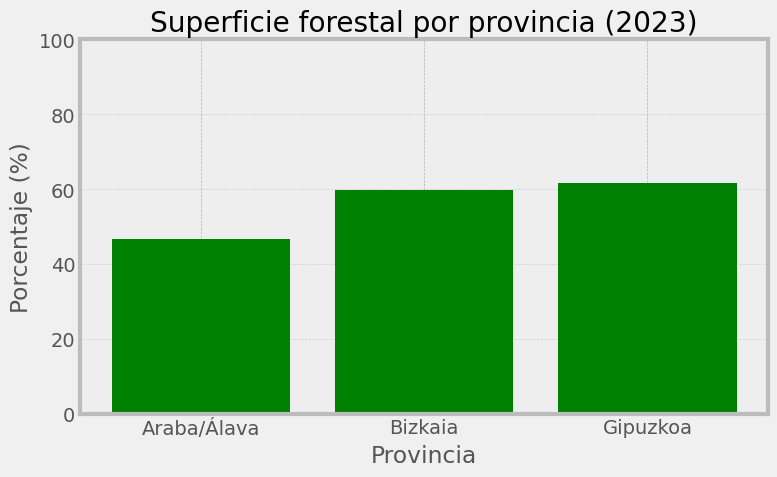

In [ ]:
provincias = ['Araba/Álava', 'Bizkaia', 'Gipuzkoa']
valores = tabla_forestal[tabla_forestal['provincia'].isin(provincias)]['sup_forestal_2023']
plt.style.use('bmh') 

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.bar(provincias, valores, color='green')
plt.ylim(0, 100)
plt.title("Superficie forestal por provincia (2023)")
plt.xlabel("Provincia")
plt.ylabel("Porcentaje (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
datos_actualizados

,provincia,sup_agricola_2018,sup_agricola_2019,sup_agricola_2020,sup_agricola_2021,sup_agricola_2022,sup_agricola_2023,sup_forestal_2018,sup_forestal_2019,sup_forestal_2020,...,sup_forestal_publica_2020,sup_forestal_publica_2021,sup_forestal_publica_2022,sup_forestal_publica_2023,esp_proteccion_2018,esp_proteccion_2019,esp_proteccion_2020,esp_proteccion_2021,esp_proteccion_2022,esp_proteccion_2023
0,Araba/Álava,27.28,27.87,27.87,27.87,28.02,27.99,46.51,46.66,46.71,...,76.51,76.53,76.52,76.51,22.14,22.14,22.14,26.87,26.92,27.40
1,Bizkaia,0.97,0.97,0.96,0.95,1.05,1.05,58.57,58.90,59.45,...,23.71,23.64,24.22,24.08,19.26,19.25,19.60,19.59,19.59,19.17
2,CAE,12.09,12.32,12.32,12.32,12.42,12.41,54.19,54.46,54.66,...,41.98,41.95,42.13,42.07,21.76,21.72,21.83,23.61,23.78,23.62
3,Gipuzkoa,1.24,1.28,1.28,1.28,1.32,1.31,61.10,61.45,61.50,...,21.52,21.50,21.49,21.46,24.08,23.94,23.94,23.19,23.74,22.89


In [ ]:
#(((PLANTEAR HIPOTESIS)))
**Gipuzkoa** presenta el mayor porcentaje de superficie forestal en 2023, con un 61,66%, seguida de Bizkaia.
 **Álava** destaca como la provincia más agrícola, con más del 27% de su superficie dedicada a uso agrícola en 2023.

Álava ha mantenido una superficie agrícola estable en torno al 28% en los últimos 5 años.
(Validable con supeficie_agricola_provincias)

Bizkaia y Gipuzkoa tienen un uso agrícola muy limitado (<2%), lo que sugiere una mayor urbanización o forestación.
(Comparación transversal en 2023)

Gipuzkoa tiene el mayor porcentaje de masa forestal en toda la serie temporal desde 2005 hasta 2023.
(Validable con superficie_forestal_provinincia)

La superficie forestal pública representa más del 75% del total forestal en Álava, indicando fuerte control institucional.
(Validable con superficie_forestal_publica_provincias)

Las zonas de especial protección han aumentado significativamente en Álava desde 2016, superando a Bizkaia.
(Validable con especial_proteccion_provincia)

Las tres provincias han incrementado gradualmente las áreas de especial protección desde 2006, pero a diferente ritmo.
(Comparativa de pendientes entre series temporales)





SyntaxError: invalid character '🌾' (U+1F33E) (1517843117.py, line 4)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
especial_proteccion_provincia

,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
provincia,,,,,,,,,,,,,,,,,
Araba/Álava,18.50,19.17,19.15,20.40,20.35,20.20,19.98,19.94,20.39,20.37,22.11,22.14,22.14,22.14,26.87,26.92,27.40
Bizkaia,20.18,19.14,19.05,19.49,19.46,18.83,19.14,19.68,19.99,19.57,19.22,19.26,19.25,19.60,19.59,19.59,19.17
CAE,19.23,19.98,19.76,20.60,20.67,20.39,20.37,20.71,21.00,20.80,21.51,21.76,21.72,21.83,23.61,23.78,23.62
Gipuzkoa,19.26,22.21,21.53,22.19,22.55,22.48,22.40,23.11,23.12,22.90,23.22,24.08,23.94,23.94,23.19,23.74,22.89


In [ ]:
#grafica de correlacion
#graficos horizontales
#group by
#grafico de dispersion
#grafico de quesitos
#orrelacion entre factores
#mapa geografico


In [ ]:
#usar un grafico similar: barras = sns.catplot (x="Type 1", y =  "Defense", data = pokemon, hue = "Type 2", col = "Legendary")
barras.set_xticklabels(rotation = 45)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
folium.Map()
geocoder()
42.85290624261429, -2.667562847594058 álava


In [ ]:
airports = vds.airports()
airports = airports[:25]
airports.head()
# multiple markers using dataframe
# there is an example below using apply function instead of loop

# create map
map_airports = folium.Map(location=[38, -98], zoom_start=4)

# plot airport locations
for (index, row) in airports.iterrows():
    folium.Marker(location = [row.loc['latitude'], row.loc['longitude']],
                 popup = row.loc['name'] + ' ' + row['city'],
                 tooltip = 'click').add_to(map_airports)

    
# display map    
map_airports

In [ ]:
# map
map_draw = folium.Map(location=[40, -99], zoom_start=4)

# draw tools
# export=True exports the drawn shapes as a geojson file
draw = plugins.Draw(export=True)

# add draw tools to map
draw.add_to(map_draw)

# display map
map_draw ##editar a mano

In [ ]:
##descargar imagenes en una carpeta nueva, automaticamente
plt.savefig('ruta') #en el mismonivel de imagenes
#script para ejecutar todo y que cargue imagenes

In [ ]:

MAPA DE ESPAÑA

# Datos
data_total_mean = pd.read_csv('data/decesos_espania.csv', sep=';')
# Creamos el mapa
m = folium.Map(location=[40.4380986,-3.844343], zoom_start = 6.5)
# Añadimos los diferentes mosaicos al mapa
tiles = ['cartodbpositron', 'cartodbdark_matter','openstreetmap']
for tile in tiles:
    folium.TileLayer(tile).add_to(m)
# Añadimos la coropleta
folium.Choropleth(
    geo_data='data/provincias-espanolas 2.0.geojson',
    name='choropleth',
    data=data_total_mean,
    columns=['Comunidad Autónoma', 'Todas las causas'],
    key_on='feature.properties.ccaa',   # dentro del 'geojson', viendo su estructura de datos
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Decesos por comunidad autonoma'
    ).add_to(m)
# Añadimos la capa de control
folium.LayerControl().add_to(m)
# Visualizamos el mapa

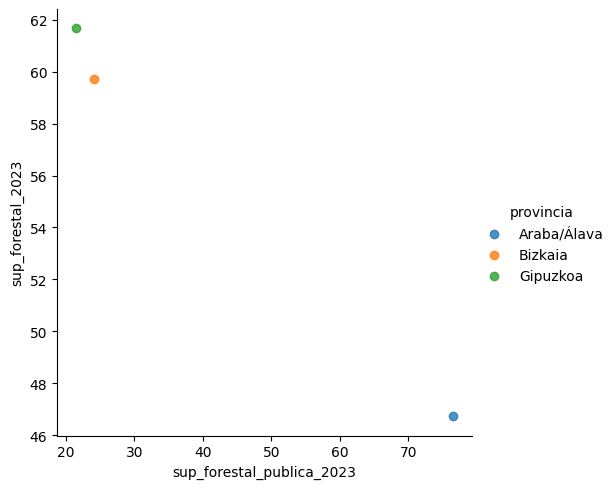

In [305]:
sns.lmplot(data=datos_actualizados_provincia, x="sup_forestal_publica_2023", y="sup_forestal_2023", hue="provincia")

In [ ]:
sns.barplot(data= zonas_verdes_persona_provincias['Araba/Álava', 'Bizkaia', 'Gipuzkoa'], x="provincia", y="2009") ##zonas verdes, mayor en 2009

KeyError: ('Araba/Álava', 'Bizkaia', 'Gipuzkoa')

In [306]:
datos_actualizados_provincia

,provincia,sup_agricola_2018,sup_agricola_2019,sup_agricola_2020,sup_agricola_2021,sup_agricola_2022,sup_agricola_2023,sup_forestal_2018,sup_forestal_2019,sup_forestal_2020,...,sup_forestal_publica_2021,sup_forestal_publica_2022,sup_forestal_publica_2023,esp_proteccion_2018,esp_proteccion_2019,esp_proteccion_2020,esp_proteccion_2021,esp_proteccion_2022,esp_proteccion_2023,Suma_Total_Por_Provincia
0,Araba/Álava,27.28,27.87,27.87,27.87,28.02,27.99,46.51,46.66,46.71,...,76.53,76.52,76.51,22.14,22.14,22.14,26.87,26.92,27.40,1053.75
1,Bizkaia,0.97,0.97,0.96,0.95,1.05,1.05,58.57,58.90,59.45,...,23.64,24.22,24.08,19.26,19.25,19.60,19.59,19.59,19.17,621.71
3,Gipuzkoa,1.24,1.28,1.28,1.28,1.32,1.31,61.10,61.45,61.50,...,21.50,21.49,21.46,24.08,23.94,23.94,23.19,23.74,22.89,647.44


In [307]:
datos_actualizados_provincia.columns

Index(['provincia', 'sup_agricola_2018', 'sup_agricola_2019',
       'sup_agricola_2020', 'sup_agricola_2021', 'sup_agricola_2022',
       'sup_agricola_2023', 'sup_forestal_2018', 'sup_forestal_2019',
       'sup_forestal_2020', 'sup_forestal_2021', 'sup_forestal_2022',
       'sup_forestal_2023', 'sup_forestal_publica_2018',
       'sup_forestal_publica_2019', 'sup_forestal_publica_2020',
       'sup_forestal_publica_2021', 'sup_forestal_publica_2022',
       'sup_forestal_publica_2023', 'esp_proteccion_2018',
       'esp_proteccion_2019', 'esp_proteccion_2020', 'esp_proteccion_2021',
       'esp_proteccion_2022', 'esp_proteccion_2023',
       'Suma_Total_Por_Provincia'],
      dtype='object')

In [308]:
datos_actualizados_provincia

,provincia,sup_agricola_2018,sup_agricola_2019,sup_agricola_2020,sup_agricola_2021,sup_agricola_2022,sup_agricola_2023,sup_forestal_2018,sup_forestal_2019,sup_forestal_2020,...,sup_forestal_publica_2021,sup_forestal_publica_2022,sup_forestal_publica_2023,esp_proteccion_2018,esp_proteccion_2019,esp_proteccion_2020,esp_proteccion_2021,esp_proteccion_2022,esp_proteccion_2023,Suma_Total_Por_Provincia
0,Araba/Álava,27.28,27.87,27.87,27.87,28.02,27.99,46.51,46.66,46.71,...,76.53,76.52,76.51,22.14,22.14,22.14,26.87,26.92,27.40,1053.75
1,Bizkaia,0.97,0.97,0.96,0.95,1.05,1.05,58.57,58.90,59.45,...,23.64,24.22,24.08,19.26,19.25,19.60,19.59,19.59,19.17,621.71
3,Gipuzkoa,1.24,1.28,1.28,1.28,1.32,1.31,61.10,61.45,61.50,...,21.50,21.49,21.46,24.08,23.94,23.94,23.19,23.74,22.89,647.44


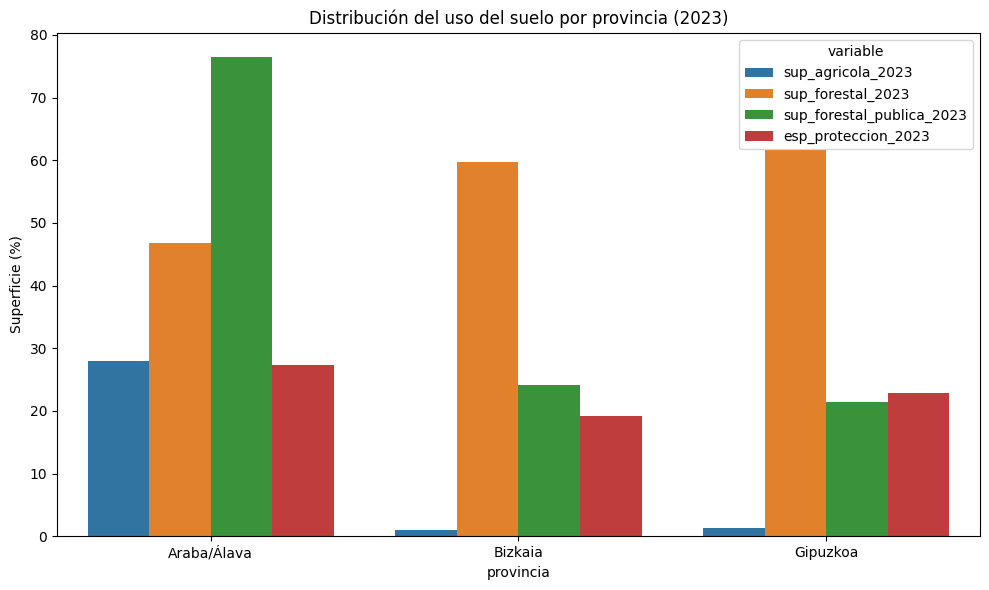

In [ ]:

#CAMBIAR COLORES Y VISUALZIACION

datos_suelo_2023 = datos_actualizados_provincia[[
    "provincia", "sup_agricola_2023", "sup_forestal_2023","sup_forestal_publica_2023",  "esp_proteccion_2023"
]]
datos_suelo_2023_melted = datos_suelo_2023.melt(id_vars="provincia")

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=datos_suelo_2023_melted, x="provincia", y="value", hue="variable")
plt.title("Distribución del uso del suelo por provincia (2023)")
plt.ylabel("Superficie (%)")
plt.tight_layout()
plt.show()


In [ ]:
#EJEMPLO DE GROUP BY

df_plot = titanic_df.groupby(['Embarked', 'Survived']).size().reset_index().pivot(columns='Embarked',
                                                                                  index='Survived',
                                                                                  values=0)
df_plot.plot(kind='bar', stacked=True);

NameError: name 'titanic_df' is not defined

In [ ]:
#EJEMPLO DE ZONAS VERDES
df_plot = zonas_verdes.groupby(['Año', 'Delegacion'])['Superficie_m2'].sum().reset_index().pivot(
    columns='Delegacion',
    index='Año',
    values='Superficie_m2'
)

df_plot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Superficie verde por Delegación a lo largo de los años")
plt.ylabel("Superficie (m²)")
plt.xlabel("Año")
plt.legend(title="Delegación", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


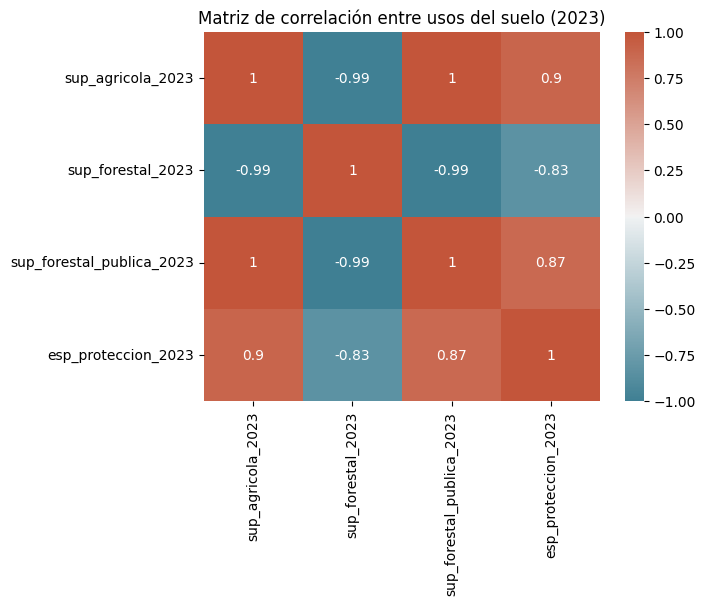

In [ ]:
##REVISAR

div_palette = sns.diverging_palette(220, 20, as_cmap=True)

# Usar en heatmap
sns.heatmap(cor_matrix, annot=True, cmap=div_palette, center=0, vmin=-1, vmax=1)
plt.title("Matriz de correlación entre usos del suelo (2023)")
plt.show()




In [ ]:
# EJEMPLO DE MALA ESCALA DE COLORES // APLICAR ARRIBA?
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(boston_df.corr(),
            annot=True,
            linewidths=.5,
            ax=ax,
            vmin=-1,
            vmax=1);

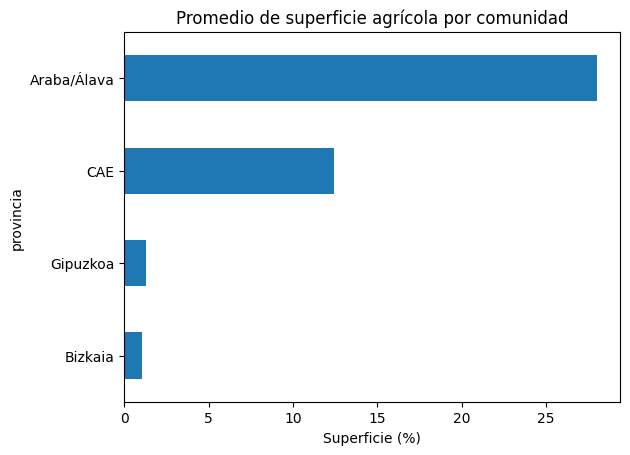

In [ ]:
#GROUP BY
datos_actualizados.groupby("provincia")["sup_agricola_2023"].mean().sort_values().plot(kind="barh")
plt.title("Promedio de superficie agrícola por comunidad")
plt.xlabel("Superficie (%)")
plt.show()


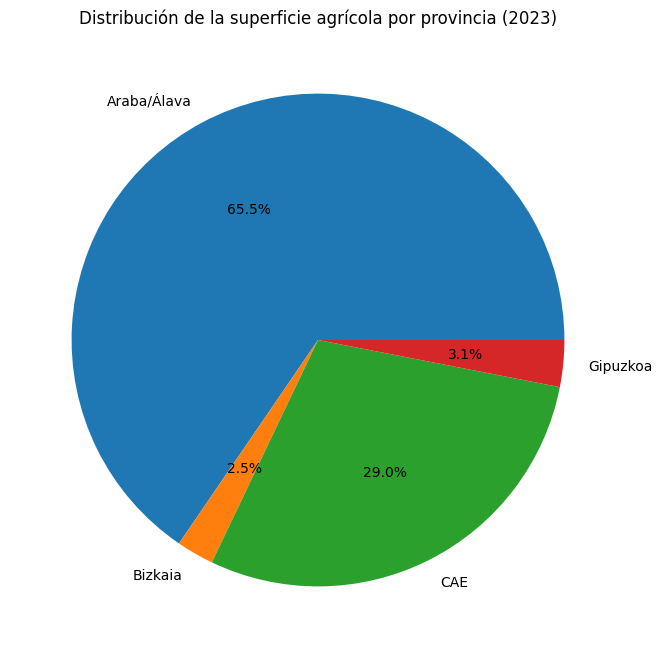

In [ ]:
# GRAFICO CIRCULAR

datos_actualizados.set_index("provincia")["sup_agricola_2023"].plot(
    kind="pie", autopct="%1.1f%%", figsize=(8, 8)
)
plt.ylabel("")
plt.title("Distribución de la superficie agrícola por provincia (2023)")
plt.show()


In [ ]:
#EJEMPLO

import squarify
import matplotlib.pyplot as plt

# Agrupar datos (en tu caso ya están por provincia)
data = datos_actualizados.set_index("provincia")["sup_agricola_2023"]
data = data.drop("CAE", errors="ignore")  # Elimina CAE si aún está

# Ordenar valores de mayor a menor
data_sorted = data.sort_values(ascending=False)

# Graficar treemap 
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=data_sorted.values,
    label=[f"{prov}\n{val:.1f}%" for prov, val in zip(data_sorted.index, data_sorted.values)],
    alpha=0.8,
    color=sns.color_palette("YlOrBr", len(data_sorted))  # Paleta cálida
)
plt.axis("off")
plt.title("Distribución de la superficie agrícola por provincia (2023)", fontsize=14, weight="bold")
plt.show()


ModuleNotFoundError: No module named 'squarify'

In [ ]:
#EJEMPLO

import squarify

data = suicid_df.groupby("country").sum()['suicides_no'].sort_values(ascending=False)[:10]

plt.figure(figsize=(15,10))
squarify.plot(sizes=data.values, label=data.index, alpha=.8 )
plt.axis('off')
plt.title("Suicidios por país")
plt.show()

In [244]:
import geopandas as gpd

# Cargar geometría
mapa_provincias = gpd.read_file("ruta/provincias.geojson")  # asegúrate de tener este archivo
mapa_provincias = mapa_provincias.merge(datos_actualizados, on="provincia")

# Mapa
mapa_provincias.plot(
    column="esp_proteccion_2023", cmap="Greens", legend=True,
    edgecolor="black", figsize=(10, 8)
)
plt.title("Zonas de especial protección por provincia (2023)")
plt.show()


ModuleNotFoundError: No module named 'geopandas'

In [253]:
especial_proteccion_provincia

,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
provincia,,,,,,,,,,,,,,,,,
Araba/Álava,18.50,19.17,19.15,20.40,20.35,20.20,19.98,19.94,20.39,20.37,22.11,22.14,22.14,22.14,26.87,26.92,27.40
Bizkaia,20.18,19.14,19.05,19.49,19.46,18.83,19.14,19.68,19.99,19.57,19.22,19.26,19.25,19.60,19.59,19.59,19.17
CAE,19.23,19.98,19.76,20.60,20.67,20.39,20.37,20.71,21.00,20.80,21.51,21.76,21.72,21.83,23.61,23.78,23.62
Gipuzkoa,19.26,22.21,21.53,22.19,22.55,22.48,22.40,23.11,23.12,22.90,23.22,24.08,23.94,23.94,23.19,23.74,22.89


In [ ]:
import pandas as pd ##MAPAS
import folium

# Cargar tus datos (adaptado a tus archivos)
datos = datos_actualizados.groupby("provincia", as_index=False)["esp_proteccion_2023"].mean()

# Crear mapa
m = folium.Map(location=[40.4380986, -3.844343], zoom_start=6.5)

# Añadir capas base
tiles = ['cartodbpositron', 'cartodbdark_matter', 'openstreetmap']
for tile in tiles:
    folium.TileLayer(tile).add_to(m)

# Capa coroplética
folium.Choropleth(
    geo_data=especial_proteccion_provincia,  # asegúrate de que esta ruta sea correcta
    name='choropleth',
    data=datos,
    columns=['provincia', 'esp_proteccion_2023'],
    key_on='feature.properties.ccaa',  # depende del nombre en tu geojson
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Superficie protegida (%) por provincias'
).add_to(m)

# Capa de control
folium.LayerControl().add_to(m)

# Mostrar mapa (en Jupyter, se visualiza automáticamente si es el último objeto)
m


ValueError: Cannot render objects with any missing geometries:               2006   2008   2009   2010   2011   2012   2013   2014   2015  \
provincia                                                                    
Araba/Álava  18.50  19.17  19.15  20.40  20.35  20.20  19.98  19.94  20.39   
Bizkaia      20.18  19.14  19.05  19.49  19.46  18.83  19.14  19.68  19.99   
CAE          19.23  19.98  19.76  20.60  20.67  20.39  20.37  20.71  21.00   
Gipuzkoa     19.26  22.21  21.53  22.19  22.55  22.48  22.40  23.11  23.12   

              2016   2017   2018   2019   2020   2021   2022   2023  
provincia                                                            
Araba/Álava  20.37  22.11  22.14  22.14  22.14  26.87  26.92  27.40  
Bizkaia      19.57  19.22  19.26  19.25  19.60  19.59  19.59  19.17  
CAE          20.80  21.51  21.76  21.72  21.83  23.61  23.78  23.62  
Gipuzkoa     22.90  23.22  24.08  23.94  23.94  23.19  23.74  22.89  

In [ ]:
mapa_provincias.plot(  ##MAPAS
    column="sup_agricola_2023",
    cmap="YlGnBu",  # Paleta de colores
    legend=True,
    edgecolor="white",
    linewidth=0.6,
    figsize=(12, 8)
)
plt.title("Superficie agrícola por provincia (2023)", fontsize=15)


NameError: name 'mapa_provincias' is not defined

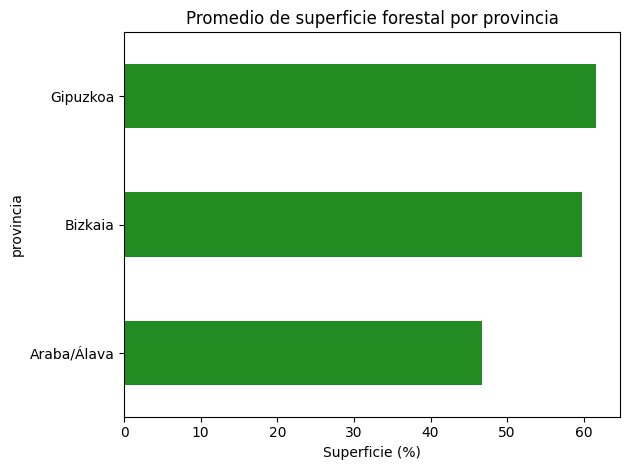

In [ ]:
datos_2023 = datos_actualizados[datos_actualizados["provincia"] != "CAE"]  ##DISTRIBUCION GEOGRAFICA
datos_2023.groupby("provincia", as_index=False)["sup_forestal_2023"].mean()\
    .sort_values("sup_forestal_2023")\
    .set_index("provincia")\
    .plot(kind="barh", color="forestgreen", legend=False)
plt.title("Promedio de superficie forestal por provincia")
plt.xlabel("Superficie (%)")
plt.tight_layout()
plt.show()

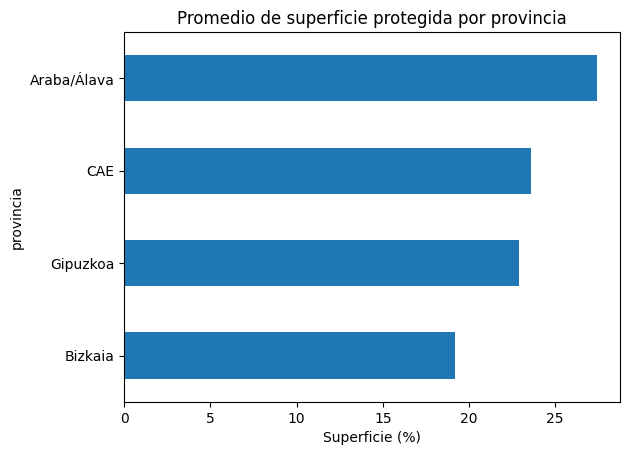

In [ ]:
datos_actualizados.groupby("provincia")["esp_proteccion_2023"].mean().sort_values().plot(kind="barh") #DISTRIBUCION
plt.title("Promedio de superficie protegida por provincia")
plt.xlabel("Superficie (%)")
plt.show()

In [ ]:
plt.figure(figsize=(30,10)); #RESVISAR
sns.catplot(x="Survived",
            col="Embarked",
            col_wrap=3,
            data=titanic_df,
            kind="count");